In [2]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
%load_ext autoreload
InteractiveShell.ast_node_interactivity = "all"
import logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

In [3]:
import pandas as pd
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

2024-07-25 10:07:49,999 - numexpr.utils - INFO - Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-07-25 10:07:50,000 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


# Load Data

In [4]:
# Fresh frozen brain evidence.txt
evidence_ffb = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/brain/txt_ssDDA_LFQ_noMBR/evidence_fresh1.txt", sep="\t"
)
evidence_mixture_ori_search_no_mbr = pd.read_csv(
    "/cmnfs/data/proteomics/timstof_hela_fractionation/no_mbr_20180809_120min_200ms_WEHI25_brute20k_timsON_100ng_HYE124A_Slot1-7_1_891.txt",
    sep="\t",
)
evidence_mixture_new_search_no_mbr = pd.read_csv(
    "/cmnfs/data/proteomics/timstof_hela_fractionation/combined/txt/evidence.txt",
    sep="\t",
)

/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/notebooks/ipykernel_2069823/1883795786.py:2: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_ffb = pd.read_csv(
/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/notebooks/ipykernel_2069823/1883795786.py:9: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_mixture_new_search_no_mbr = pd.read_csv(


<Axes: >

Text(0.5, 1.0, 'Mass error new search mixture in range 0.005 to 0.12')

Text(0.5, 0, '(Da)')

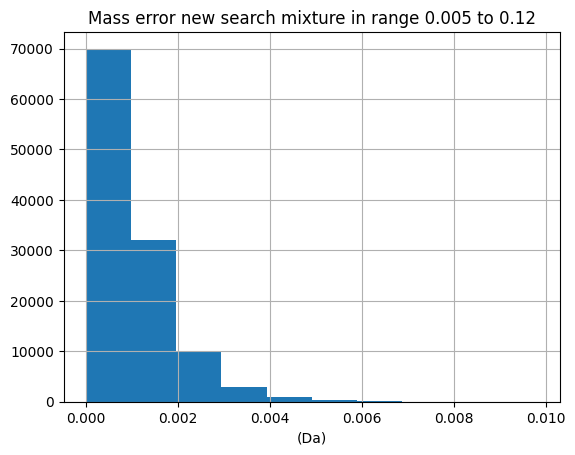

In [8]:
import matplotlib.pyplot as plt

abs(evidence_mixture_new_search_no_mbr["Mass error [Da]"]).hist()
plt.title("Mass error new search mixture in range 0.005 to 0.12")
plt.xlabel("(Da)")

<Axes: >

Text(0.5, 1.0, 'Mass error original search in range 0.005 to 0.12')

Text(0.5, 0, '(Da)')

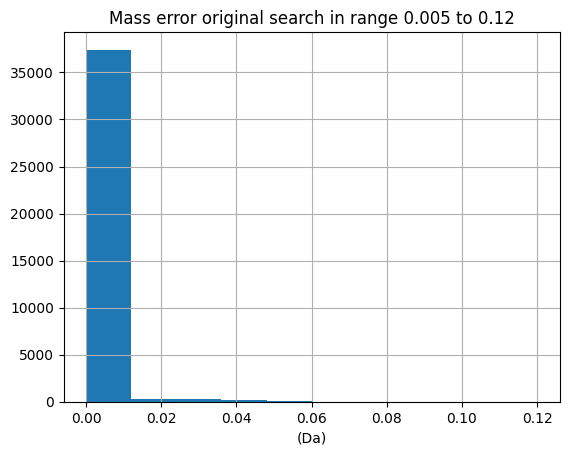

In [9]:
import matplotlib.pyplot as plt

abs(evidence_mixture_ori_search_no_mbr["Mass error [Da]"]).hist(range=(0.0, 0.12))
plt.title("Mass error original search in range 0.005 to 0.12")
plt.xlabel("(Da)")

<Axes: >

Text(0.5, 1.0, 'Mass error FreshFrozenBrain in range 0.005 to 0.12')

Text(0.5, 0, '(Da)')

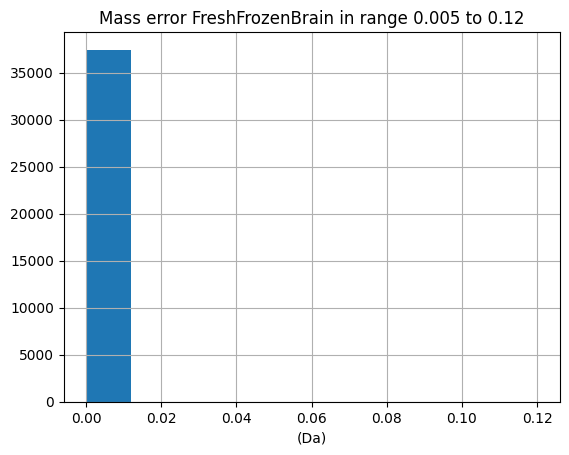

In [10]:
abs(evidence_ffb["Mass error [Da]"]).hist(range=(0, 0.12))
plt.title("Mass error FreshFrozenBrain in range 0.005 to 0.12")
plt.xlabel("(Da)")

# Check meta data

In [22]:
from utils.ims_utils import load_dotd_data

mixture_dotd, _ = load_dotd_data(
    "/cmnfs/data/proteomics/timstof_hela_fractionation/20180809_120min_200ms_WEHI25_brute20k_timsON_100ng_HYE124A_Slot1-7_1_891.d/"
)

2024-07-24 08:58:31,673 - root - INFO - Importing data from /cmnfs/data/proteomics/timstof_hela_fractionation/20180809_120min_200ms_WEHI25_brute20k_timsON_100ng_HYE124A_Slot1-7_1_891.d
2024-07-24 08:58:31,675 - root - INFO - Using HDF import for /cmnfs/data/proteomics/timstof_hela_fractionation/20180809_120min_200ms_WEHI25_brute20k_timsON_100ng_HYE124A_Slot1-7_1_891.hdf
2024-07-24 08:58:32,175 - root - INFO - Successfully imported data from /cmnfs/data/proteomics/timstof_hela_fractionation/20180809_120min_200ms_WEHI25_brute20k_timsON_100ng_HYE124A_Slot1-7_1_891.d
2024-07-24 08:58:32,177 - utils.ims_utils - INFO - No output directory provided, using the directory of the .d file
2024-07-24 08:58:32,178 - utils.ims_utils - INFO - HDF file /cmnfs/data/proteomics/timstof_hela_fractionation/20180809_120min_200ms_WEHI25_brute20k_timsON_100ng_HYE124A_Slot1-7_1_891.d/20180809_120min_200ms_WEHI25_brute20k_timsON_100ng_HYE124A_Slot1-7_1_891.hdf already exists


In [23]:
from alphatims.bruker import read_bruker_sql

mixture_meta = read_bruker_sql(
    "/cmnfs/data/proteomics/timstof_hela_fractionation/20180809_120min_200ms_WEHI25_brute20k_timsON_100ng_HYE124A_Slot1-7_1_891.d"
)

2024-07-24 08:59:21,441 - root - INFO - Reading frame metadata for /cmnfs/data/proteomics/timstof_hela_fractionation/20180809_120min_200ms_WEHI25_brute20k_timsON_100ng_HYE124A_Slot1-7_1_891.d


In [26]:
mixture_meta

('ddaPASEF',
                            Key  \
 0                   SchemaType   
 1           SchemaVersionMajor   
 2           SchemaVersionMinor   
 3    AcquisitionSoftwareVendor   
 4             InstrumentVendor   
 5          TimsCompressionType   
 6               ClosedProperly   
 7           MaxNumPeaksPerScan   
 8                   AnalysisId   
 9          DigitizerNumSamples   
 10    PeakListIndexScaleFactor   
 11             MzAcqRangeLower   
 12             MzAcqRangeUpper   
 13      OneOverK0AcqRangeLower   
 14      OneOverK0AcqRangeUpper   
 15         AcquisitionSoftware   
 16  AcquisitionSoftwareVersion   
 17  AcquisitionFirmwareVersion   
 18         AcquisitionDateTime   
 19              InstrumentName   
 20            InstrumentFamily   
 21          InstrumentRevision   
 22        InstrumentSourceType   
 23      InstrumentSerialNumber   
 24                OperatorName   
 25                 Description   
 26                  SampleName   
 27    